<a href="https://colab.research.google.com/github/jaleftwi/MAT421_Modules/blob/main/MAT421_ModuleB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module B**

---
The second module that will be covered from MAT 421 is Module B. This section will cover the first half of Module B, covering lessons including:

*   17.1 Interpolation Problem Statement
*   17.2 Linear Interpolation
*   17.3 Cubic Spline Interpolation


## **Section 17.1 Interpolation Problem Statement**
---
Firstly, it is important to understand what interpolation really is.

A data set may contain many various data points- yet often this data is not sufficient for determining all necessary values. Because estimation is required to some degree in modeling data- often times interpolation is involved to determine a model for the nonprovided data values.

This differs slightly from regression- in which regression seeks to find a "best fit" according to data provided. Regression may not pass through provided values in the model- in contrast interpolation strives to pass through reliable data points, connecting them point-to-point. Because of this, interpolation may occasionally not fall under an underlying model- while regression will also create a "best fit" to such a type of model.

There is not simply one form of interpolation. In estimating values, connecting the space between reliable data points can take on many forms. Regardless of whether the model is linear from point to point or cubic, interpolation takes the independent values x and the dependent values y to create an estimation function y(xi) = yi (i being the index indicating every known data point). Inserting a new x called x* into the estimation function and evaluating y(x*) is called interpolation.

**Note**: Interpolation is the process of estimating point between given data, while extrapolation is estimating points outside (before or after) the given data.


## **Section 17.2 Linear Interpolation**
---
Linear Interpolation is the process of connecting the relaible data point by straight lines. Thus, the estimated points are assumed to be directly between the already known data values.

If x\* is a point between [xi, xi+1], then the linear interpolation near x can be expressed as y(x\*) = (yi) + (x\* - xi)\* ((yi+1 - yi)/(xi+1 - xi))


**Homework Question**: *Write a function my_lin_interp(x, y, X), where x and y are arrays containing experimental data points, and X is an array. Assume that x and X are in ascending order and have unique elements. The output argument, Y, should be an array, the same size as X, where Y[i] is the linear interpolation of X[i]. You should not use interp from numpy or interp1d from scipy.*

In [45]:
def my_lin_interp(x, y, estX):
  import math
  estY = []
  
  # Go through each element in X to create an estimate Y
  for m in estX:
    # Find the index i preceding current data point m
    i = -1    # Start before the first element (0th)
    for value in x:
      if m > value:
        i = i+1

    # Evaluate expression to interpolate current value
    estimateY = y[i] + (m - x[i])*((y[i+1] - y[i]) / (x[i+1] - x[i]))
    estY.append(estimateY)

  # end for loop
  return estY

Trials:

In [46]:
x = [2, 4, 7]
y = [5, 4, 6]
estX = [3, 5]

my_lin_interp(x, y, estX)

[4.5, 4.666666666666667]

In [47]:
x = [1, 5, 10]
y = [5, 25, 75]
estX = [2, 8, 9]

my_lin_interp(x, y, estX)

[10.0, 55.0, 65.0]

## **Section 17.3 Cubic Spline Interpolation**
---
It should be noted, however, that assuming that the transition from one known data point to another is a linear relationship may often times be unrealistic. In many cases, the estimation function is broken up into several piecewise cubic functions in respect to each space between known data values. Thus the interpolation function may be similar in form to:

y(x\*) = {S(x\*) = (a1)x^3 + (b1)x^2 + (c1)x + (d1) for x in [x1, x2], ... , S(x\*) = (an-1)x^3 + (bn-1)x^2 + (cn-1)x + (dn-1) for x in [xn-1, xn]}

This process is a bit more complicated than it may seem at first glance. After all, each piecewise function contains 4 unknown parameters that must be solved for. In determining these parameters, there are certain contrants that must be account for:

Firstly, each point of the piecewise intersects known data points. Therefore, Si(xi) = (yi) and Si(xi+1) = (yi+1) for each index i.

Secondly, to ensure that piecewise function join smoothly across the estimation, it is important for the function. Thus Si\'(xi) = Si+1'(xi+1) **AND** Si\"(xi) = Si\"i+1(xi+1) for each index i.

Depending on the circumstance, a third constraint may be occasionally added in which the second derivatives of S(x) are equal to 0 at the endpoints of the piecewise function. That is to say S1\"(x1) = 0 and Sn\"(xn) = 0.

Once the constraints are set, a matrix may be formed to solve for parameters. Alternatively, a computer program may be used to estimate the parameters. Below is some python code that may help in visualizing cubic interpolation:


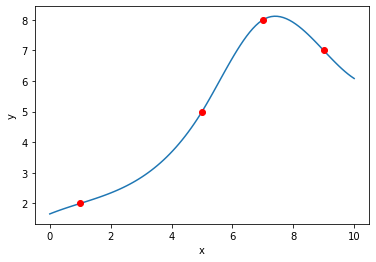

In [5]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as pic

# Set up arbitrary arrays representing pairs of data points, x must be in ascending order
x = [1, 5, 7, 9]
y = [2, 5, 8, 7]

f = CubicSpline(x, y, bc_type = 'natural')    # Note: bc_type = natural sets the constraints mentioned in connecting the piecewise functions

# Values to be estimated
xnew = np.linspace(0, 10, 100)
ynew = f(xnew)

# Visualization of the estimation
pic.figure()
pic.plot(xnew, ynew)
pic.plot(x, y, 'ro')
pic.xlabel('x')
pic.ylabel('y')
pic.show()

